## Conditional entropies evaluation
#### Test conditions: 
    a = 0.5
    b = 1/16.0
    A = 2.5
    omega = 2.0
    gamma = 0.1
    period = 2*np.pi/(1.0*omega)
    h = period/32 # time step
    
    new_data = position[::23]

In [2]:
import sys
sys.path.insert(0, '../../dcgram_v2')
import save_plot as sp
import numpy as np
sys.path.insert(0, '../../dcgram_v2/tests')
from pibic import *
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools

path = '../..'

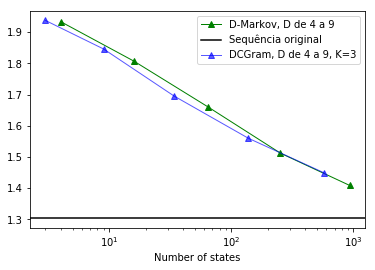

In [3]:
import dcgram
import save_plot as sp

sp.save_plot('cond_entropies', 'duffing_equation', drange = [1,2,3,4,5], krange = [3])

In [7]:
# sp.save_plot(parameter='cond_entropies', name='duffing_equation', drange = range(2,6), krange = [3, 5, 7])

## Kolmogorov-Smirnov Tests

In [2]:
def kolmogorov_test(beta = 0.1, D = 2, K = 3, \
                    subseq_len = 1000, subseq_rep = 1000, dataset = 'duffing_equation', L = 1391305):
    
    leg = '{:1.2f}'.format(beta).replace('.', '')
    with open(f'{path}/dcgram_files/{dataset}/original/original_len_{L}.yaml', 'r') as f:
        s = yaml.load(f)    
    with open(f'{path}/dcgram_files/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
        m_test = yaml.load(f)    
#     with open(f'{path}/dcgram_files/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
#         m_test = yaml.load(f)
    with open(f'{path}/dcgram_files/{dataset}_{leg}/original/original_len_{L}.yaml', 'r') as f:
        s_test = yaml.load(f)
    
#     occup_vector = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
    occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
    occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, subseq_len)
    
    stat, p = ks_2samp(occup_vector, occup_vector_anomaly)
    return stat, p

def plot_graph(x=[], y=[], D=2, K=3, N=1000, ylabel='p-value', legend = 'legend', color = 'k'):
    plt.plot(x, y, color, label = legend)
    plt.title(f'D={D}, K={K}')
    plt.xlabel(r'$\beta$')
    plt.ylabel(ylabel)
    plt.yscale('log')
    plt.legend()
    plt.savefig(f'plots/{ylabel}_D{D}_K{K}_{N}.png')

In [ ]:
betas = np.arange(0.02, 0.48, 0.02)

p = []
stat = []

for D in [4]:
    K = 3
    
    for beta in betas:
        stval, pval = kolmogorov_test(beta = beta, D = D, K = K, subseq_len = 1000, subseq_rep = 1)
        p.append(pval)
        stat.append(stval)

    plot_graph(betas, p, D, K, ylabel='p-value')


In [ ]:
# p_dmark_4 = p.copy()
# st_dmark_4 = stat.copy()
# p_dmark_3 = p.copy()
# st_dmark_3 = stat.copy()
# p_dcgram_4 = p.copy()
# st_dcgram_4 = stat.copy()
p_dcgram_3 = p.copy()
st_dcgram_3 = stat.copy()

In [ ]:
plot_graph(betas, p_dmark_3, D, K, ylabel='p-value', color= 'k')
# plot_graph(betas, p_dcgram_3, D, K, ylabel='p-value', color = 'r')
plot_graph(betas, p_dmark_4, D, K, ylabel='p-value', color= 'y')
plot_graph(betas, p_dcgram_4, D, K, ylabel='p-value', color = 'b')
# plot_graph(betas, stat, D, K, ylabel='p-value')

In [6]:
def evaluate_occup_div(D = 2, K = 3, N = 10000, L = 1391305, betas = []):
    dc_kl = []
    dm_kl = []

    for beta in betas:
        dataset = 'duffing_equation'
        leg = '{:1.2f}'.format(beta).replace('.', '')

        with open(f'{path}/dcgram_files/{dataset}/original/original_len_{L}.yaml', 'r') as f:
            s = yaml.load(f)    
        with open(f'{path}/dcgram_files/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
            m_test = yaml.load(f)    
        with open(f'{path}/dcgram_files/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
            m = yaml.load(f)
        with open(f'{path}/dcgram_files/{dataset}_{leg}/original/original_len_{L}.yaml', 'r') as f:
            s_test = yaml.load(f)

        dc_occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
        # occup_vector2 = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
        dc_occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, N)
        dm_occup_vector = eig.occup_vector(m)    # Calculate occupation vector from eigen vectors
        dm_occup_vector_anomaly = sa.calc_occup_vector_dict(m, s_test, N)

        dc_kl.append(sa.calc_kldivergence_vector(dc_occup_vector, dc_occup_vector_anomaly))
        dm_kl.append(sa.calc_kldivergence_vector(dm_occup_vector, dm_occup_vector_anomaly))
        
    with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dc_kl}, f)
    with open(f'kl_results/kl_dmark_D{D}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dm_kl}, f)

In [6]:
def evaluate_occup_div_8(D = 2, K = 3, N = 10000, L = 1391305, betas = []):
    dc_kl = []
    dm_kl = []

    for beta in betas:
        dataset = 'duffing_equation'
        leg = '{:1.2f}'.format(beta).replace('.', '')

        with open(f'{path}/dcgram_files_N8/{dataset}/original/original_len_{L}.yaml', 'r') as f:
            s = yaml.load(f)    
        with open(f'{path}/dcgram_files_N8/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
            m_test = yaml.load(f)    
        with open(f'{path}/dcgram_files_N8/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
            m = yaml.load(f)
        with open(f'{path}/dcgram_files_N8/{dataset}_{leg}/original/original_len_{L}.yaml', 'r') as f:
            s_test = yaml.load(f)

        dc_occup_vector = eig.occup_vector(m_test)    # Calculate occupation vector from eigen vectors
        # occup_vector2 = sa.iterate_machine(m_test, L)    # Simulates ocuppation vector
        dc_occup_vector_anomaly = sa.calc_occup_vector_dict(m_test, s_test, N)
        dm_occup_vector = eig.occup_vector(m)    # Calculate occupation vector from eigen vectors
        dm_occup_vector_anomaly = sa.calc_occup_vector_dict(m, s_test, N)

        dc_kl.append(sa.calc_kldivergence_vector(dc_occup_vector, dc_occup_vector_anomaly))
        dm_kl.append(sa.calc_kldivergence_vector(dm_occup_vector, dm_occup_vector_anomaly))
        
    with open(f'kl_results_N8/kl_dcgram_D{D}_K{K}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dc_kl}, f)
    with open(f'kl_results_N8/kl_dmark_D{D}_N{N}', 'w') as f:
        yaml.dump({'betas': betas, 'kl': dm_kl}, f)

In [7]:
# D = [2,3,4,5]
D = [2,3,4,5]
K = [5]
N = [100000]
# N = [10000, 100000]
b = np.arange(0.01, 0.49, 0.01)

possibilities = list(itertools.product(D, K, N))

for (D, K, N) in possibilities:
    evaluate_occup_div(D = D, K = K, N = N, betas = b, L = 1391305)
#     evaluate_occup_div_8(D = D, K = K, N = N, betas = b)

Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibler divergence calculated!
*****************
Calculating Kullback-Leibler divergence
*****************
Kullback-Leibl

In [3]:
def plot_kldiv(D = 2, K = 3, N = 10000):
    with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
        result = yaml.load(f)
        dc = result['kl']
    with open(f'kl_results/kl_dmark_D{D}_N{N}', 'r') as f:
        result = yaml.load(f)
        dm = result['kl']
        betas = result['betas']

    plot_graph(betas, dc, D, K, N = N, ylabel='$D$', legend = 'DCGraM', color= 'y')
    plot_graph(betas, dm, D, K, N = N, ylabel='$D$', legend = 'D-Markov', color = 'b')

In [8]:
def plot_kldiv_8(D = 2, K = 3, N = 10000):
    with open(f'kl_results_N8/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
        result = yaml.load(f)
        dc = result['kl']
    with open(f'kl_results_N8/kl_dmark_D{D}_N{N}', 'r') as f:
        result = yaml.load(f)
        dm = result['kl']
        betas = result['betas']

    plot_graph(betas, dc, D, K, N = N, ylabel='$D$', legend = 'DCGraM', color= 'y')
    plot_graph(betas, dm, D, K, N = N, ylabel='$D$', legend = 'D-Markov', color = 'b')

In [ ]:
D = [2,3,4,5]
K = [3]
N = [20000, 50000]
b = np.arange(0.01, 0.49, 0.01)

possibilities = list(itertools.product(D, K, N))

for (D, K, N) in possibilities:
    print((D,K,N))
    plot_kldiv(D, K, N)
    plt.clf()

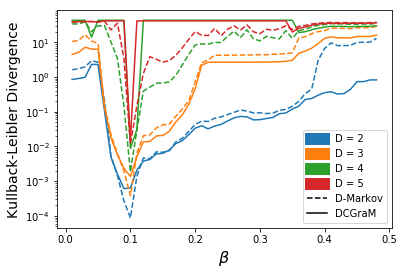

In [8]:
import matplotlib.lines as mlines

handles, labels = [], []
N = 100000
K = 5

for D in [2,3,4,5]:
    with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
        result = yaml.load(f)
        dc = result['kl']
    with open(f'kl_results/kl_dmark_D{D}_N{N}', 'r') as f:
        result = yaml.load(f)
        dm = result['kl']
        betas = result['betas']
    p = plt.plot(betas, dc, label = f'{D} DCGraM')
    p = plt.plot(betas, dm, color = p[-1].get_color(), linestyle = '--', label = f'{D} D-Markov')

    empty_patch = mpatches.Patch(color=p[-1].get_color(), linestyle='-', linewidth = 5.0, label=f'D = {D}') # create a patch with no color
    handles.append(empty_patch)  # add new patches and labels to list
    labels.append(f'D = {D}')
    
dmarkov = mlines.Line2D([], [], color='k', linestyle = '--', label='D-Markov')
dcgram = mlines.Line2D([], [], color='k', linestyle = '-', label='DCGraM')
handles.append(dmarkov)
handles.append(dcgram)
labels.append('D-Markov')
labels.append('DCGraM')
plt.legend(handles, labels) # apply new handles and labels to plot

    
plt.yscale('log')
# plt.legend()
plt.ylabel('Kullback-Leibler Divergence', fontsize=14)
plt.xlabel('$\\beta$', fontsize=16)
# plt.xlim(0.08, 0.13)
plt.savefig(f'plots/K{K}_N_{N}.eps')
plt.show()    

In [5]:
for D, K in list(itertools.product([2,3,4,5],[3,5])):
    path = '../..'
    dataset = 'duffing_equation'
#     K = 3
    
    with open(f'{path}/dcgram_files/{dataset}/results/machines/dcgram/dcgram_D{D}_K{K}.yaml', 'r') as f:
        m_test = yaml.load(f)    
    with open(f'{path}/dcgram_files/{dataset}/results/machines/dmarkov/dmark_D{D}.yaml', 'r') as f:
        m = yaml.load(f)
        
    print(f'D = {D}, K = {K}; D-Markov states: {len(m.states)}, DCGraM states: {len(m_test.states)}')

D = 2, K = 3; D-Markov states: 16, DCGraM states: 8
D = 2, K = 5; D-Markov states: 16, DCGraM states: 11
D = 3, K = 3; D-Markov states: 64, DCGraM states: 34
D = 3, K = 5; D-Markov states: 64, DCGraM states: 37
D = 4, K = 3; D-Markov states: 252, DCGraM states: 141
D = 4, K = 5; D-Markov states: 252, DCGraM states: 165
D = 5, K = 3; D-Markov states: 924, DCGraM states: 573
D = 5, K = 5; D-Markov states: 924, DCGraM states: 640


In [ ]:
import matplotlib.lines as mlines

handles, labels = [], []
N = 100000
K = 3
D = 1


with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
    result = yaml.load(f)
    dc = result['kl']
with open(f'kl_results/kl_dmark_D{D}_N{N}', 'r') as f:
    result = yaml.load(f)
    dm = result['kl']
    betas = result['betas']
p = plt.plot(betas[4:44:5], dc[4:44:5], label = f'{D} DCGraM')
p = plt.plot(betas[4:44:5], dm[4:44:5], color = p[-1].get_color(), linestyle = '--', label = f'{D} D-Markov')

empty_patch = mpatches.Patch(color=p[-1].get_color(), linestyle='-', linewidth = 5.0, label=f'n = 4') # create a patch with no color
handles.append(empty_patch)  # add new patches and labels to list
labels.append(f'n = 4')

with open(f'kl_results_N8/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
    result = yaml.load(f)
    dc = result['kl']
with open(f'kl_results_N8/kl_dmark_D{D}_N{N}', 'r') as f:
    result = yaml.load(f)
    dm = result['kl']
    betas = result['betas']
p = plt.plot(betas, dc, label = f'{D} DCGraM')
p = plt.plot(betas, dm, color = p[-1].get_color(), linestyle = '--', label = f'{D} D-Markov')

empty_patch = mpatches.Patch(color=p[-1].get_color(), linestyle='-', linewidth = 5.0, label=f'n = 8') # create a patch with no color
handles.append(empty_patch)  # add new patches and labels to list
labels.append(f'n = 8')
    
dmarkov = mlines.Line2D([], [], color='k', linestyle = '--', label='D-Markov')
dcgram = mlines.Line2D([], [], color='k', linestyle = '-', label='DCGraM')
handles.append(dmarkov)
handles.append(dcgram)
labels.append('D-Markov')
labels.append('DCGraM')
plt.legend(handles, labels) # apply new handles and labels to plot

    
plt.yscale('log')
# plt.legend()
plt.ylabel('$D_{KL}$', fontsize=16)
plt.xlabel('$\\beta$', fontsize=16)
plt.savefig(f'plots/quantization_K{K}_N_{N}.eps')
plt.show()    

In [ ]:
D = 5
K = 3
N = 100000

with open(f'kl_results/kl_dcgram_D{D}_K{K}_N{N}', 'r') as f:
    result = yaml.load(f)
    dc = result['kl']
with open(f'kl_results/kl_dmark_D{D}_N{N}', 'r') as f:
    result = yaml.load(f)
    dm = result['kl']
    betas = result['betas']


beta = 0.09 + 0.01
dckl = np.array(dc)[np.where(betas == beta)]
dmkl = np.array(dm)[np.where(betas == beta)]

print(dckl)
print(dmkl)